# Gray-level Mapping (input images)

In [6]:
from skimage.color import rgb2gray
from PIL import Image
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib 
import cv2
matplotlib.rcParams["font.family"] = "Arial"

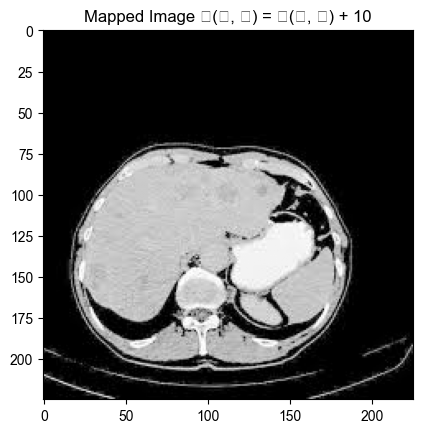

In [7]:
#    Mapping function : i. 𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 10

img = mpimg.imread("1.jpg")
imgray = rgb2gray(img)
img_mapped = imgray + 10

plt.imshow(img_mapped, cmap = plt.get_cmap("gray"))
plt.title("Mapped Image 𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 10")
plt.show()


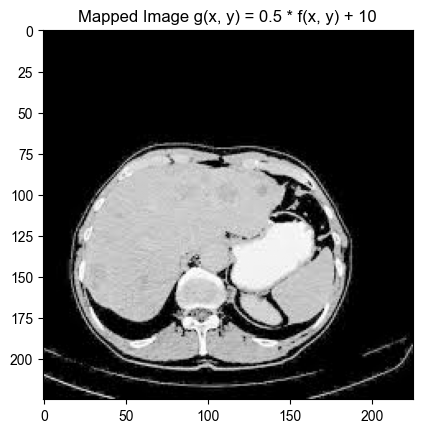

In [8]:
img_mapped = (imgray * 0.5) + 10

plt.imshow(img_mapped, cmap = plt.get_cmap("gray"))
plt.title("Mapped Image g(x, y) = 0.5 * f(x, y) + 10")
plt.show()

# Negative Transformation (input images 1,2,3)

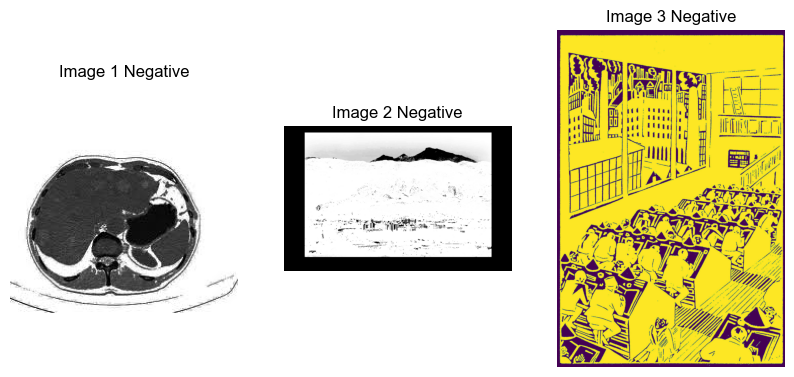

In [9]:
image1 = Image.open("1.jpg")
image2 = Image.open("2.png")
image3 = Image.open("3.jpg")

image1_neg = image1.point(lambda x: 255 - x)
image2_neg = image2.point(lambda x: 255 - x)
image3_neg = image3.point(lambda x: 255 - x)

plt.figure(figsize = (10, 10))

plt.subplot(1, 3, 1)
plt.imshow(image1_neg)
plt.title("Image 1 Negative")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(image2_neg)
plt.title("Image 2 Negative")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(image3_neg)
plt.title("Image 3 Negative")
plt.axis("off")

plt.show()


# Gamma Transformation (input image 11)
Take the following values of 𝛾 : 0.50, 0.10, 2.0, 4.0

In [10]:
def cal_c(image, gamma): c = 255 / np.log(1 + image); return c

def gamma_transform(image, gamma = 1.0):
    normalized_image = image / 255
    gamma_correction = np.array(cal_c(image, gamma) * (normalized_image ** gamma), dtype = "uint8")
    return gamma_correction

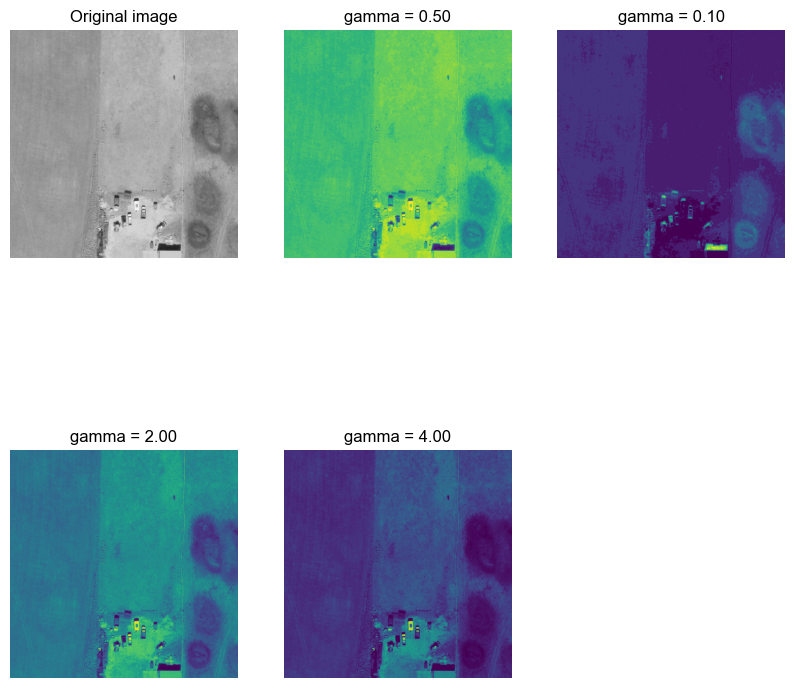

In [11]:
original_img = cv2.imread("11.png")
original_img_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
gamma_corrected_img_1 = gamma_transform(original_img, 0.5)
gamma_corrected_img_2 = gamma_transform(original_img, 0.10)
gamma_corrected_img_3 = gamma_transform(original_img, 2.0)
gamma_corrected_img_4 = gamma_transform(original_img, 4)

plt.figure(figsize = (10, 10))

plt.subplot(2, 3, 1)
plt.imshow(original_img)
plt.title("Original image")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(gamma_corrected_img_1, cv2.COLOR_BGR2GRAY))
plt.title("gamma = 0.50")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(gamma_corrected_img_2, cv2.COLOR_BGR2GRAY))
plt.title("gamma = 0.10")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(gamma_corrected_img_3, cv2.COLOR_BGR2GRAY))
plt.title("gamma = 2.00")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(gamma_corrected_img_4, cv2.COLOR_BGR2GRAY))
plt.title("gamma = 4.00")
plt.axis("off")

plt.show()

# Logarithmic Mapping (input images 9,10).
 Calculate “c” first.

In [12]:
def cal_c(image): c = 255 / np.log(1 + np.max(image)); return c

def log_mapping(image):
    log_img = np.log(image + 1) # 1 to fix log(0) error
    log_img = cal_c(image) * log_img
    return np.array(log_img, dtype = "uint8")

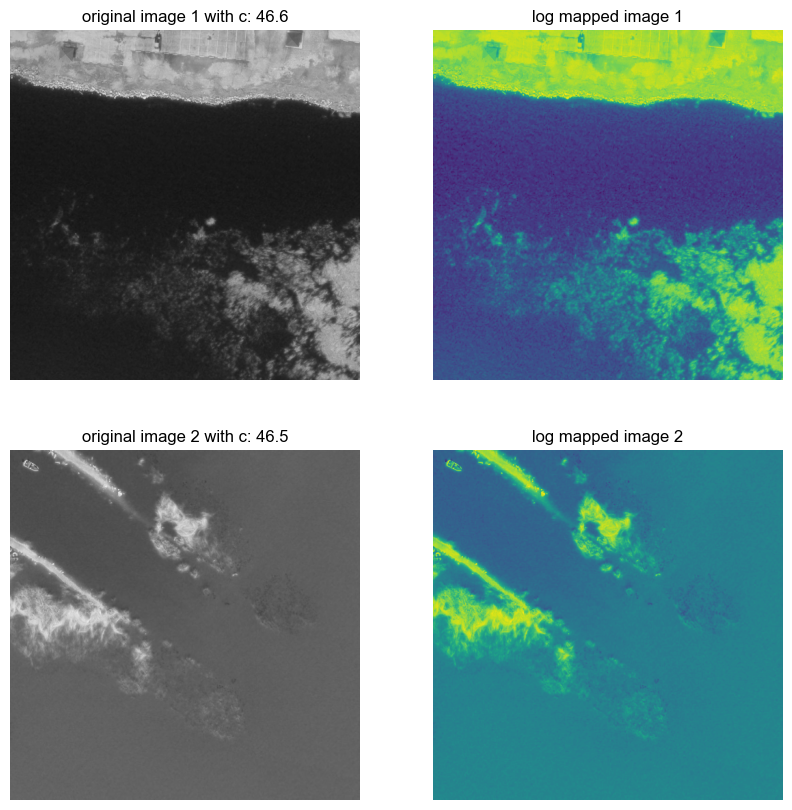

In [13]:
img1 = cv2.imread("9.png", cv2.COLOR_BGR2GRAY) 
img2 = cv2.imread("10.png", cv2.COLOR_BGR2GRAY)
log_img1 = log_mapping(img1)
log_img2 = log_mapping(img2)

plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.title("original image 1 with c: " + str(cal_c(img1)))
plt.imshow(img1)
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("log mapped image 1")
plt.imshow(cv2.cvtColor(log_mapping(img1), cv2.COLOR_BGR2GRAY))
plt.axis("off")

plt.subplot(2, 2, 3)
plt.title("original image 2 with c: " + str(cal_c(img2)))
plt.imshow(img2)
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("log mapped image 2")
plt.imshow(cv2.cvtColor(log_mapping(img2), cv2.COLOR_BGR2GRAY))
plt.axis("off")

plt.show()



# Exponential Mapping (input images 4,5,6,7,8).
 Calculate “c” first.

In [14]:
def cal_c(image): return 255 / (np.exp(image) - 1)

def exp_transform(image):
    normalized_image = image / 255
    exp_image = cal_c(normalized_image) * np.exp(normalized_image)
    return exp_image

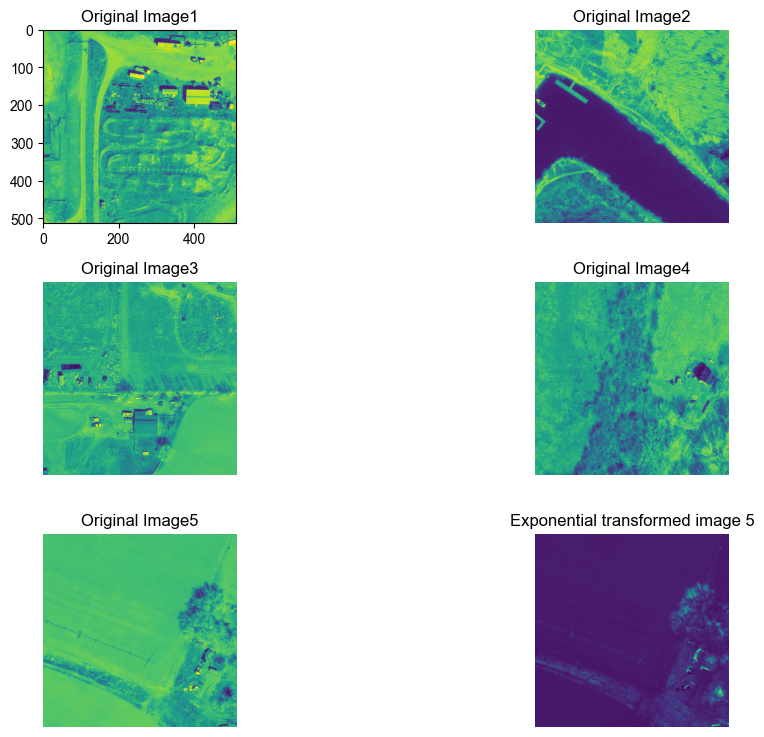

In [17]:
paths = ["4.png", "5.png", "6.png", "7.png", "8.png"]
plt.figure(figsize = (10, 10))

for i, path in enumerate(paths):
    original_img = cv2.imread(path)
    gray_scaled_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)    
    exp_img = exp_transform(gray_scaled_img)

    plt.subplot(4, 2, i + 1)
    plt.imshow(gray_scaled_img)
    plt.title("Original Image" + str(i + 1))
    plt.subplot(4, 2, i + 2)
    plt.imshow(exp_img)
    plt.title("Exponential transformed image " + str(i + 1))
    plt.axis("off")
plt.tight_layout()
plt.show()

# Intensity-level slicing (input image 15)
Select appropriate intensity-level range to highlight the bright portion of the image.

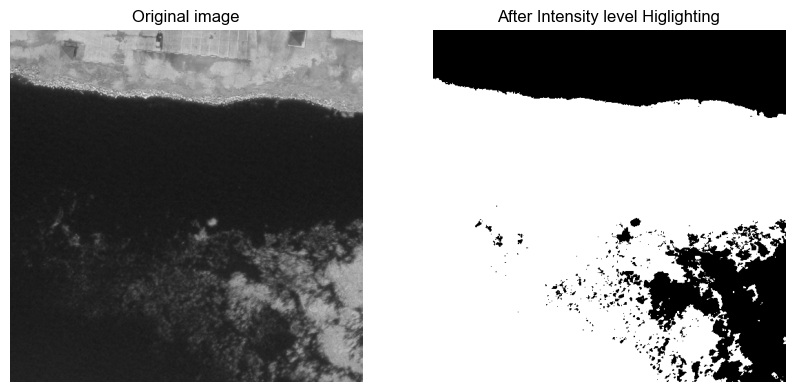

In [21]:
img = cv2.imread("15.png", cv2.COLOR_BGR2GRAY)
min_intensity = 10
max_intensity = 60

sliced_intensity = np.where((img >= min_intensity) & (img <= max_intensity), 255, 0).astype("uint8")
plt.figure(figsize = (10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(sliced_intensity)
plt.title("After Intensity level Higlighting")
plt.axis("off")

plt.show()

# Bit-plane slicing (input image 18)
i. Output – images of bit plane 1,2,3,4,5,6,7,8  
ii. Reconstruct the image from bit plane images 5,6,7,8

After Bit Plane Slicing


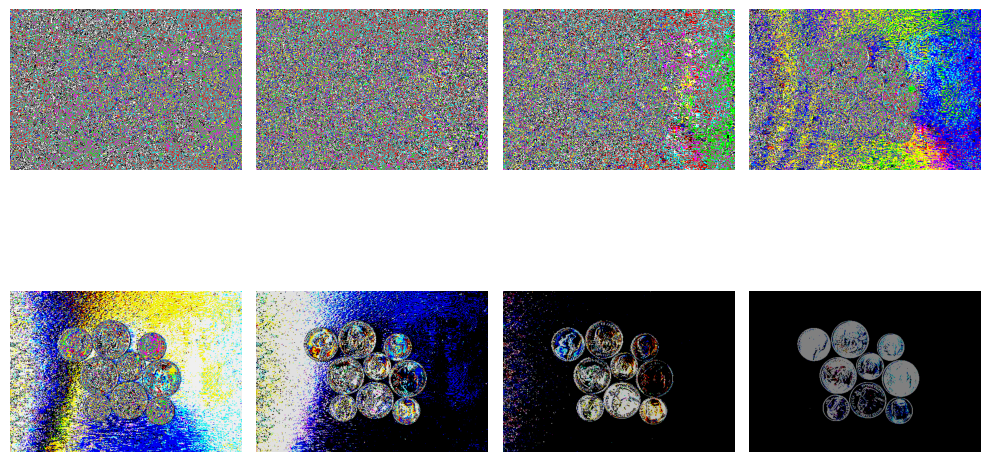

In [31]:
# i. output - bit plane 1, 2,..., 8 's images
img = cv2.imread("18.jpg")
plt.figure(figsize = (10, 10))
bit_plane_lst = []

for bit in range(8):
    bit_plane = (img & (1 << bit)) * 255
#[255, 255...upto^^^8 bits] &[0, 0, 0, 0, 0, 0, 0, 1] -> give only one plane :)
    bit_plane_lst.append(bit_plane)
    plt.subplot(2, 4, bit + 1)
    plt.imshow(bit_plane)
    plt.axis("off")
    plt.tight_layout()

print("After Bit Plane Slicing")
plt.axis("off")
plt.show()

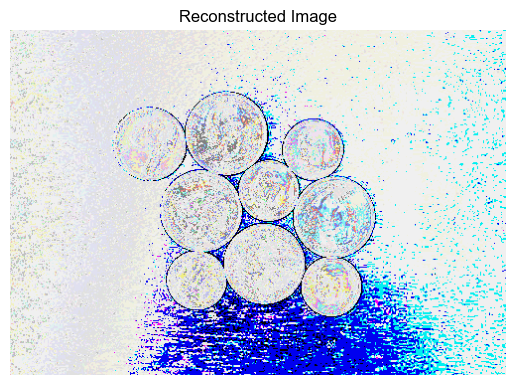

In [34]:
# ii. Reconstruct the image from bit plane images 5,6,7,8
reconstructed_img = bit_plane_lst[4] | bit_plane_lst[5] | bit_plane_lst[6] | bit_plane_lst[7]
plt.imshow(reconstructed_img)
plt.title("Reconstructed Image")
plt.axis("off")
plt.show()

# Histogram Processing
Write code for calculating the histogram of the image (input image 19).  
Display the output as the “Histogram Graph”


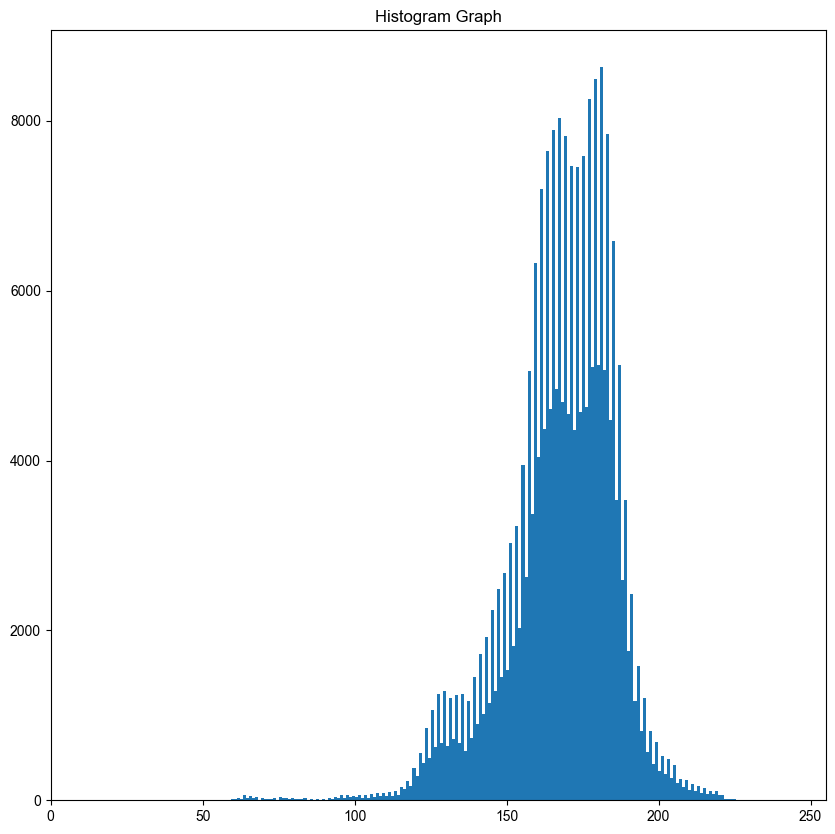

In [48]:
# Gray-Scaling is mandatory here otherwise for r, g, b all we have to find the histogram
img = cv2.imread("19.png", 0)
hist, bins = np.histogram(img.ravel(), bins = 256, range = [0, 255])

plt.figure(figsize = (10, 10))
plt.bar(bins[0: -1], hist, width = 1)
plt.xlim(0, 255)
plt.title("Histogram Graph")
plt.show()

# Contrast/Histogram Stretching 
(input image 20)

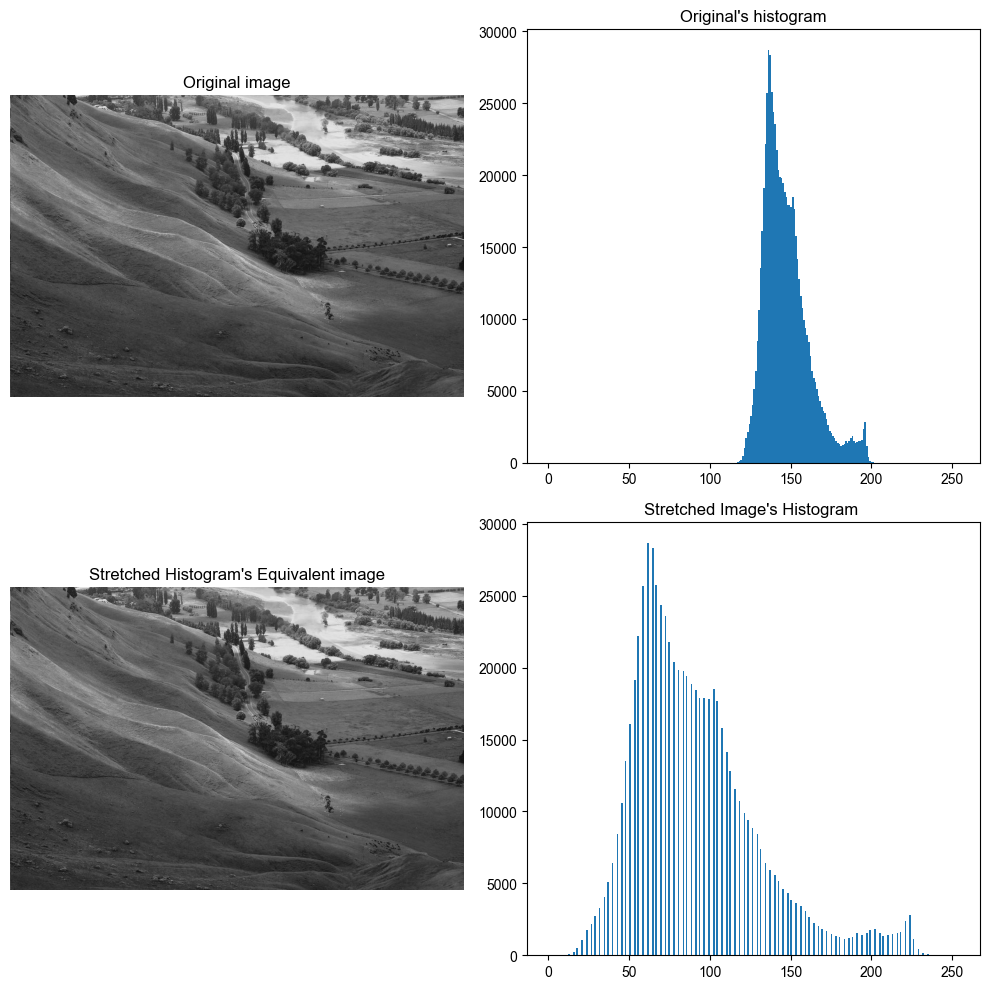

In [61]:
img = cv2.imread("20.jpg", cv2.IMREAD_GRAYSCALE)

min_px_intensity = np.min(img)
max_px_intensity = np.max(img)

stretched_hist_img = ((img - min_px_intensity) / (max_px_intensity - min_px_intensity) * 255).astype(np.uint8)

hist_img, bins_img = np.histogram(img.ravel(), 256, (0, 255))
hist_simg, bins_simg = np.histogram(stretched_hist_img.ravel(), 256, (0, 255))

plt.figure(figsize = (10, 10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap = "gray")
plt.title("Original image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.title("Original's histogram")
plt.bar(bins_img[: -1], hist_img, width = 1)

plt.subplot(2, 2, 3)
plt.imshow(stretched_hist_img, cmap = "gray")
plt.title("Stretched Histogram's Equivalent image")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.title("Stretched Image's Histogram ")
plt.bar(bins_simg[: -1], hist_simg, width = 1)

plt.tight_layout()
plt.show()